In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#outcomes
outcomes=pd.read_csv("../Cholesterol_Data/ANOVA_relevantChols_quantilenormed.csv",sep="\t")
outcomes=outcomes.rename(columns={"Unnamed: 0":"AETID"})
outcomes=outcomes.set_index("AETID",inplace=False)
outcomes

,Campestanol µg/dl,Campesterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
AETID,,,,,
AET0044,41.458895,46.468789,39.662632,44.501789,42.482474
AET0380,67.878579,76.027737,64.537474,65.386895,52.602526
AET0027,44.008684,46.043947,42.802895,47.678211,55.210053
AET0049,61.334053,56.392579,59.671632,56.745526,66.070737
AET0006,34.404368,35.503211,43.591789,41.326737,39.177263
...,...,...,...,...,...
AET0021,31.469053,39.662632,25.072000,31.725579,35.503211
AET0071,35.148421,38.095684,30.366684,36.000789,33.430000
AET0138,36.000789,31.469053,43.286526,34.619421,35.148421


In [14]:
#CADD13 mechanism features
CADD13_mechanisms_scores=pd.read_csv("../Input_for_Models/CADD13_mechanisms_scores_processed.csv")
CADD13_mechanisms_scores=CADD13_mechanisms_scores.rename(columns={"Sample":"AETID"})
CADD13_mechanisms_scores=CADD13_mechanisms_scores.set_index("AETID",inplace=False)
CADD13_mechanisms_scores
samples=list(CADD13_mechanisms_scores.index)

In [15]:
CADD13_mechanisms_scores

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,...,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,0.000009,0.000028,0.002736,0.001473,0.000096,0.001167,0.001273,0.001187,0.001249,0.000009,...,0.001463,0.001176,0.001463,0.000203,0.0,0.001167,0.000009,0.000072,0.001167,0.002631
AET0380,0.000009,0.000028,0.001414,0.000009,0.000048,0.001356,0.001414,0.001376,0.001510,0.000009,...,0.000000,0.001365,0.000000,0.000165,0.0,0.001356,0.000009,0.000145,0.001356,0.001356
AET0027,0.000060,0.000062,0.001408,0.000060,0.000096,0.000980,0.001136,0.000982,0.001112,0.000060,...,0.000000,0.001040,0.000000,0.000165,0.0,0.000980,0.000060,0.000072,0.000980,0.000980
AET0049,0.000009,0.000041,0.001481,0.000009,0.000096,0.001375,0.001481,0.001407,0.001529,0.000009,...,0.000000,0.001384,0.000000,0.000338,0.0,0.001375,0.000009,0.000145,0.001375,0.001375
AET0006,0.000060,0.000079,0.003162,0.001524,0.000000,0.001638,0.001698,0.001657,0.001698,0.000060,...,0.001463,0.001698,0.001463,0.000165,0.0,0.001638,0.000060,0.000000,0.001638,0.003102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000060,0.000060,0.000651,0.000060,0.000096,0.000494,0.000651,0.000494,0.000554,0.000060,...,0.000000,0.000554,0.000000,0.000040,0.0,0.000494,0.000060,0.000000,0.000494,0.000494
AET0071,0.000009,0.000048,0.001186,0.000009,0.000096,0.001080,0.001186,0.001119,0.001234,0.000009,...,0.000000,0.001089,0.000000,0.000040,0.0,0.001080,0.000009,0.000145,0.001080,0.001080
AET0138,0.000070,0.000107,0.001429,0.000070,0.000096,0.001262,0.001429,0.001299,0.001405,0.000070,...,0.000000,0.001333,0.000000,0.000040,0.0,0.001262,0.000070,0.000072,0.001262,0.001262


In [4]:
#clinical data / confounder
confounder=pd.read_csv("../Clinical_Data/Counfounder6_scaled_input_intercept_headers.csv")
confounder=confounder.set_index("AETID",inplace=False)
confounder=confounder.drop(["intercept"],axis=1)
confounder

,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
AETID,,,,,,
AET0044,0.062505,0.0,2.0,1,0,0
AET0380,0.890703,1.0,1.0,0,1,0
AET0027,-2.185458,0.0,1.0,1,0,0
AET0049,1.009017,0.0,2.0,1,0,1
AET0006,0.890703,1.0,2.0,0,1,1
...,...,...,...,...,...,...
AET0021,-0.292436,1.0,2.0,1,0,0
AET0071,0.417447,0.0,3.0,0,0,1
AET0138,0.417447,0.0,2.0,1,0,1


In [6]:
#merge them 
data = pd.concat([outcomes,CADD13_mechanisms_scores,confounder], axis=1, sort=False)

In [21]:
# examine scores between the groups 
CADD13_mechs_groups=pd.concat([CADD13_mechanisms_scores,confounder],axis=1,sort=False)

In [23]:
CADD13_mechs_groups=CADD13_mechs_groups.drop(["Age","Smoking","Alcohol","Sex","Levodopa"],axis=1)

/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


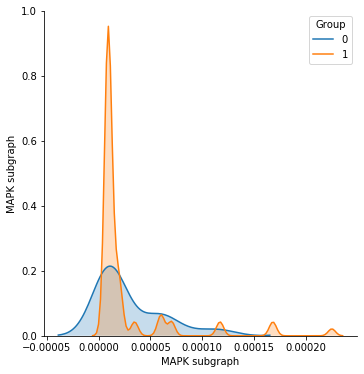

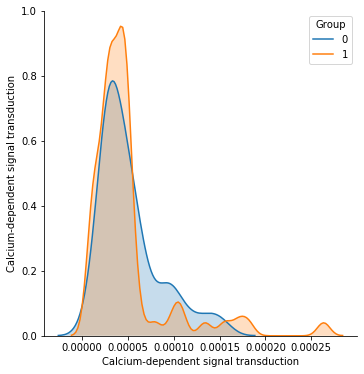

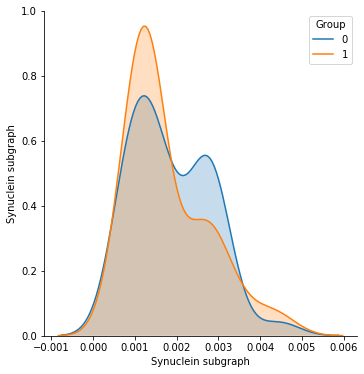

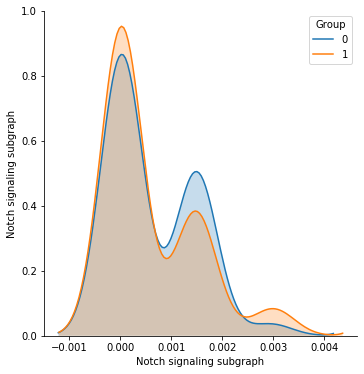

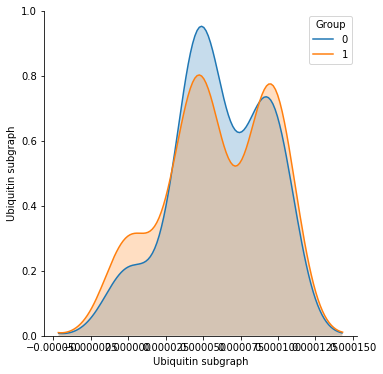

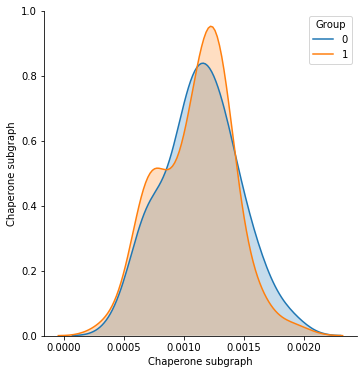

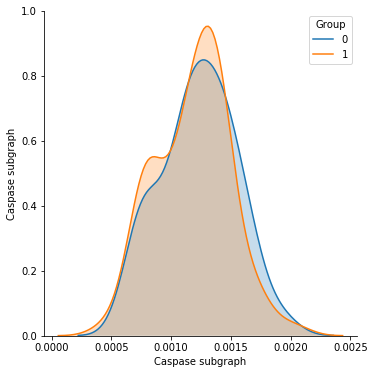

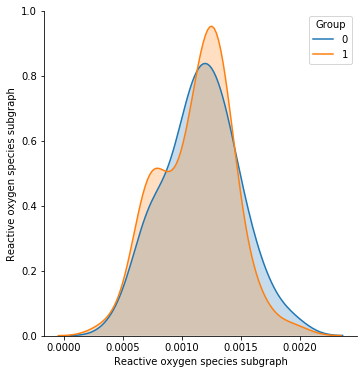

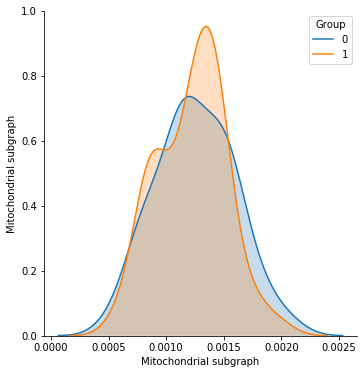

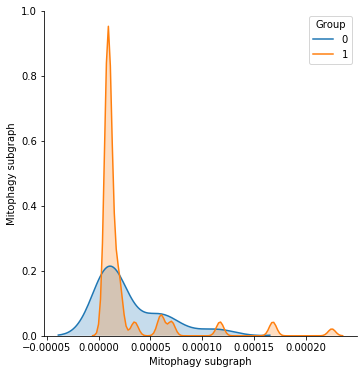

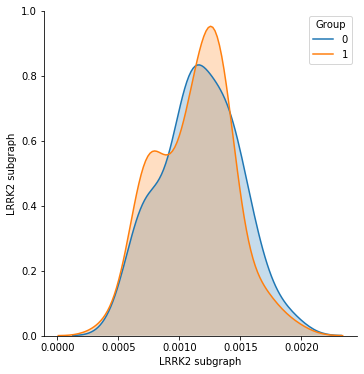

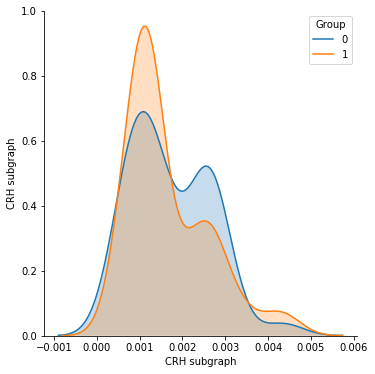

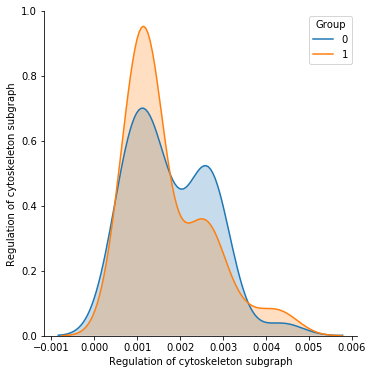

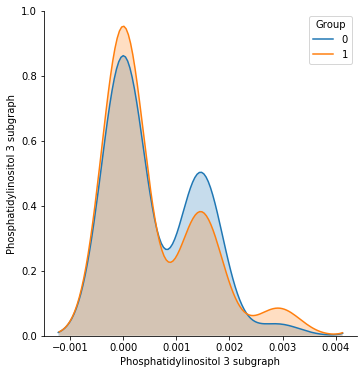

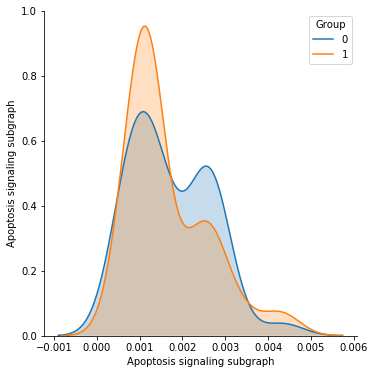

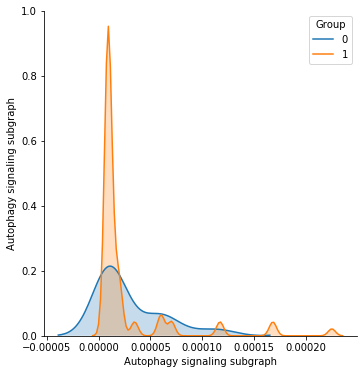

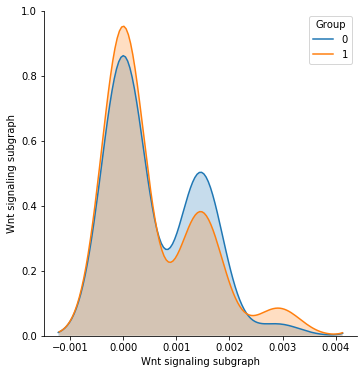

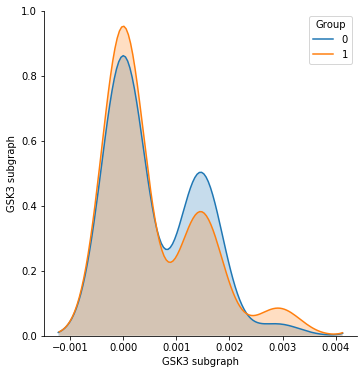

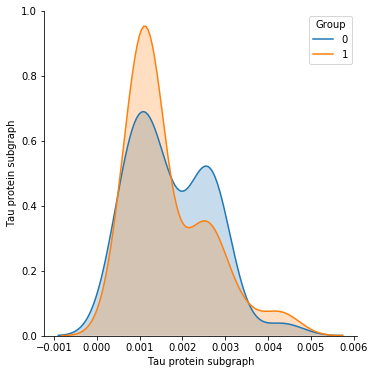

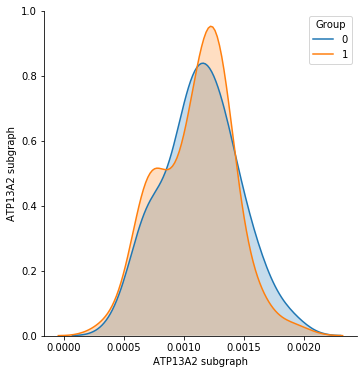

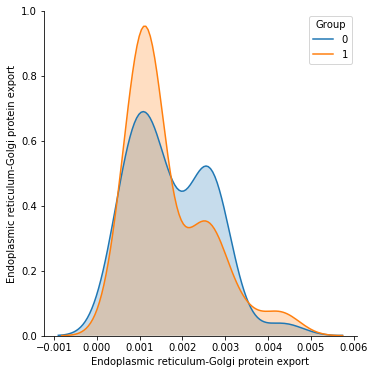

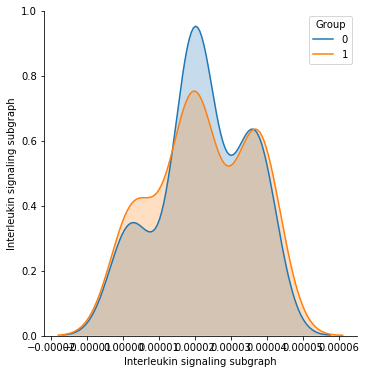

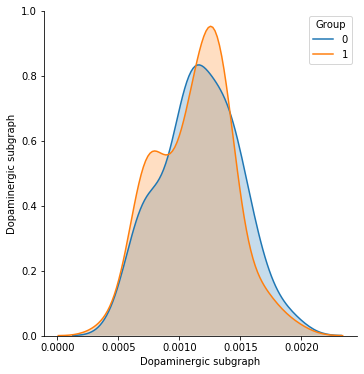

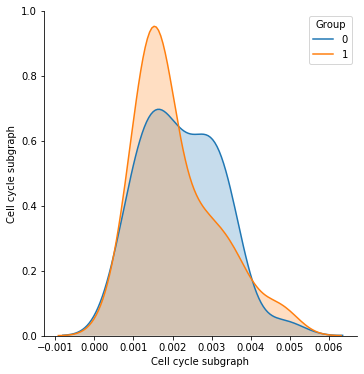

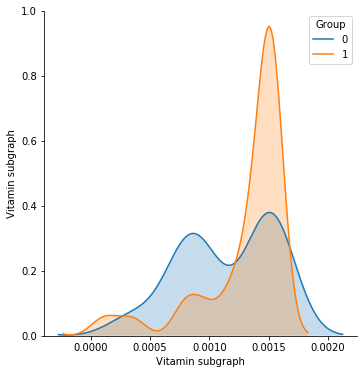

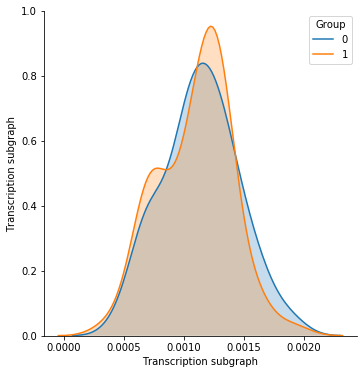

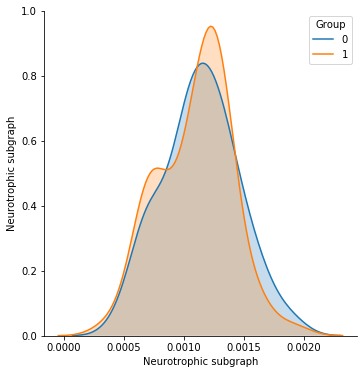

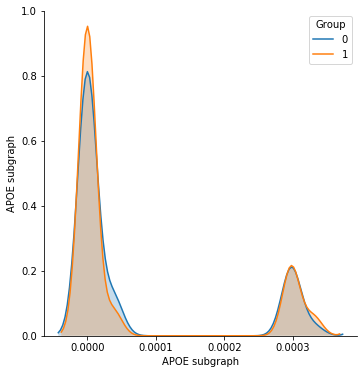

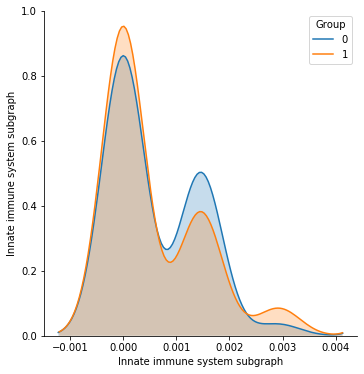

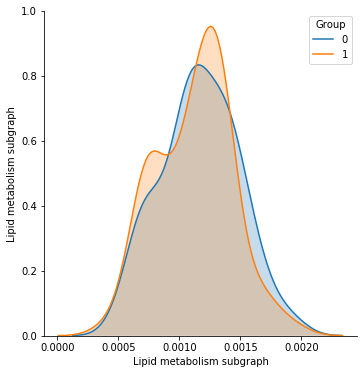

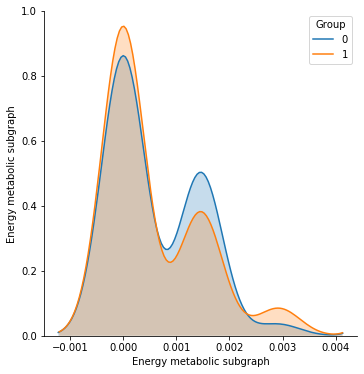

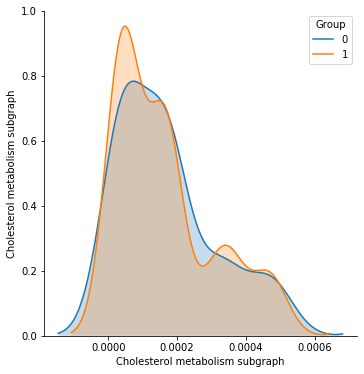

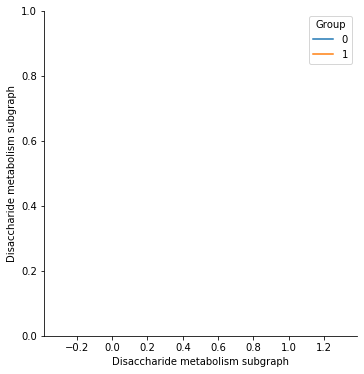

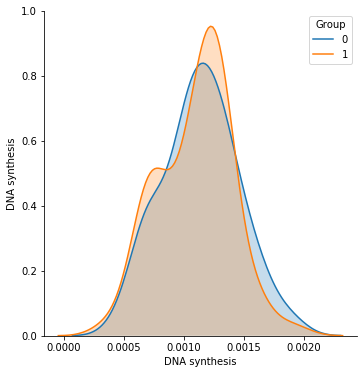

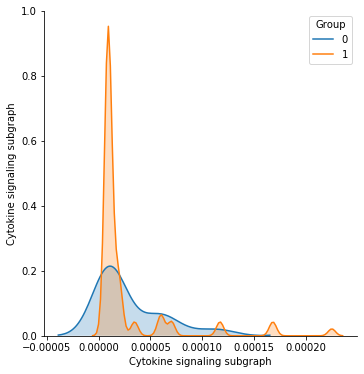

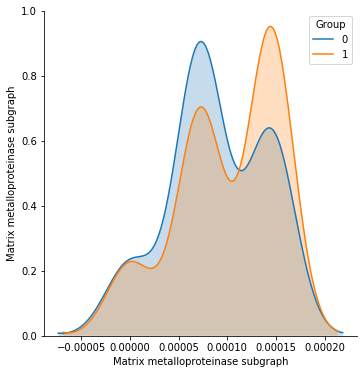

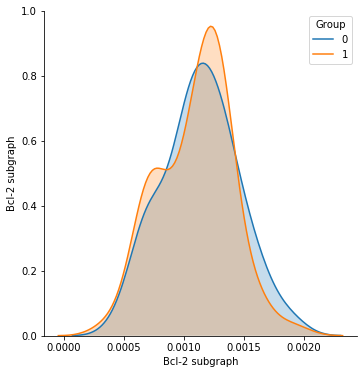

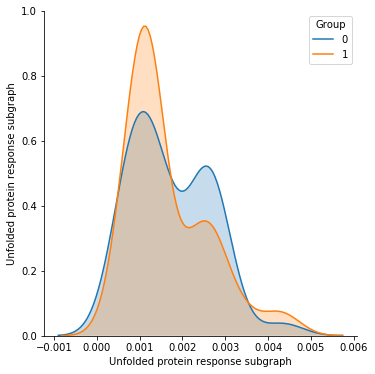

In [53]:
#plot
plt.rcParams.update({'figure.max_open_warning': 0})
for col in CADD13_mechs_groups.columns:
    if col!="Group_IPD":
        g=sns.pairplot(CADD13_mechs_groups[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        g._legend.remove()
        plt.legend(title='Group')

In [7]:
data_chols_mechs=pd.concat([outcomes,CADD13_mechanisms_scores])

In [16]:
outcomes.corrwith(CADD13_mechanisms_scores)

APOE subgraph                                NaN
ATP13A2 subgraph                             NaN
Apoptosis signaling subgraph                 NaN
Autophagy signaling subgraph                 NaN
Bcl-2 subgraph                               NaN
CRH subgraph                                 NaN
Calcium-dependent signal transduction        NaN
Campestanol µg/dl                            NaN
Campesterol mg/dl                            NaN
Caspase subgraph                             NaN
Cell cycle subgraph                          NaN
Chaperone subgraph                           NaN
Cholesterol metabolism subgraph              NaN
Cytokine signaling subgraph                  NaN
DNA synthesis                                NaN
Disaccharide metabolism subgraph             NaN
Dopaminergic subgraph                        NaN
Endoplasmic reticulum-Golgi protein export   NaN
Energy metabolic subgraph                    NaN
GSK3 subgraph                                NaN
Innate immune system

In [10]:
corr

,Campestanol µg/dl,Campesterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,...,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
Campestanol µg/dl,1.000000,0.768176,0.911917,0.760376,0.604865,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campesterol mg/dl,0.768176,1.000000,0.710446,0.848507,0.648979,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sitostanol µg/dl,0.911917,0.710446,1.000000,0.775972,0.669969,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sitosterol mg/dl,0.760376,0.848507,0.775972,1.000000,0.793515,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stigmasterol µg/dl,0.604865,0.648979,0.669969,0.793515,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAPK subgraph,NaN,NaN,NaN,NaN,NaN,1.000000,0.948857,0.157779,0.180681,-0.142520,...,0.136593,0.118458,0.136593,0.036410,-0.067188,-0.007001,1.000000,-0.051949,-0.007001,0.122072
Calcium-dependent signal transduction,NaN,NaN,NaN,NaN,NaN,0.948857,1.000000,0.131869,0.150199,-0.157873,...,0.108213,0.109274,0.108213,0.063276,-0.011596,-0.009791,0.948857,0.000143,-0.009791,0.095320
Synuclein subgraph,NaN,NaN,NaN,NaN,NaN,0.157779,0.131869,1.000000,0.941621,0.033527,...,0.941243,0.432491,0.941243,0.023576,-0.123712,0.415620,0.157779,-0.083662,0.415620,0.992966
Notch signaling subgraph,NaN,NaN,NaN,NaN,NaN,0.180681,0.150199,0.941621,1.000000,0.017638,...,0.999003,0.128215,0.999003,0.022564,-0.097582,0.106302,0.180681,-0.094255,0.106302,0.944341
Ubiquitin subgraph,NaN,NaN,NaN,NaN,NaN,-0.142520,-0.157873,0.033527,0.017638,1.000000,...,0.024234,-0.090402,0.024234,0.008781,-0.050182,-0.073041,-0.142520,-0.175513,-0.073041,-0.001835


In [7]:
data.to_csv("../Input_for_Models/Input_MANCOVA/chols_mechs_confs.csv",header=True,index=True)

In [ ]:
############################# CADD13 scaled ##########################

In [4]:
CADD13_mechanisms_scores_scaled=pd.read_csv("../Input_for_Models/CADD13_mechanisms_scores_scaled_processed.csv")
CADD13_mechanisms_scores_scaled=CADD13_mechanisms_scores_scaled.rename(columns={"Sample":"AETID"})
CADD13_mechanisms_scores_scaled=CADD13_mechanisms_scores_scaled.set_index("AETID",inplace=False)
CADD13_mechanisms_scores_scaled

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,...,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,-0.484502,-0.534158,0.976705,1.018326,1.119721,0.187927,0.246048,0.178072,0.047140,-0.484502,...,1.047654,0.125847,1.047654,0.266184,-0.138675,0.187927,-0.484502,-0.483460,0.187927,1.015344
AET0380,-0.484502,-0.534318,-0.426211,-0.703675,-0.361868,0.811301,0.709128,0.801136,0.895818,-0.484502,...,-0.686753,0.744847,-0.686753,-0.005260,-0.138675,0.811301,-0.484502,0.980734,0.811301,-0.359794
AET0027,0.848736,0.308773,-0.431843,-0.643592,1.119721,-0.431345,-0.203460,-0.497286,-0.396694,0.848736,...,-0.686753,-0.321878,-0.686753,-0.005260,-0.138675,-0.431345,0.848736,-0.483460,-0.431345,-0.766407
AET0049,-0.484502,-0.215579,-0.355066,-0.703675,1.119721,0.873608,0.929628,0.905740,0.957150,-0.484502,...,-0.686753,0.806717,-0.686753,1.241552,-0.138675,0.873608,-0.484502,0.980734,0.873608,-0.339406
AET0006,0.848736,0.733302,1.427964,1.078409,-1.843460,1.740171,1.644634,1.729598,1.505787,0.848736,...,1.047654,1.834401,1.047654,-0.005260,-0.138675,1.740171,0.848736,-1.947656,1.740171,1.523262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.848736,0.254862,-1.235702,-0.643592,1.119721,-2.032517,-1.799726,-2.104876,-2.207872,0.848736,...,-0.686753,-1.911816,-0.686753,-0.909169,-0.138675,-2.032517,0.848736,-1.947656,-2.032517,-1.290335
AET0071,-0.484502,-0.057455,-0.668048,-0.703675,1.119721,-0.099396,-0.040395,-0.045817,-0.000630,-0.484502,...,-0.686753,-0.159460,-0.686753,-0.909169,-0.138675,-0.099396,-0.484502,0.980734,-0.099396,-0.657788
AET0138,1.112846,1.408750,-0.410084,-0.631690,1.119721,0.500829,0.759112,0.547181,0.553729,1.112846,...,-0.686753,0.636877,-0.686753,-0.909169,-0.138675,0.500829,1.112846,-0.483460,0.500829,-0.461385


In [6]:
#merge them 
data_scaledCadd = pd.concat([outcomes,CADD13_mechanisms_scores_scaled,confounder], axis=1, sort=False)
data_scaledCadd.to_csv("../Input_for_Models/Input_MANCOVA/chols_mechsCADD_scaled_confs.csv",header=True,index=True)

In [ ]:
##################################################################################

In [54]:
# dann scores
dann_mechanism_scores=pd.read_csv("../Input_for_Models/dann_mechanisms_scores_processed.csv")
dann_mechanism_scores=dann_mechanism_scores.rename(columns={"Sample":"AETID"})
dann_mechanism_scores=dann_mechanism_scores.set_index("AETID",inplace=False)
dann_mechanism_scores

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,...,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,0.000025,0.000079,0.008420,0.004693,0.000273,0.003454,0.003752,0.003508,0.003802,0.000025,...,0.004668,0.003479,0.004668,0.000595,0.0,0.003454,0.000025,0.000323,0.003454,0.008121
AET0380,0.000025,0.000078,0.004493,0.000025,0.000137,0.004331,0.004493,0.004384,0.005003,0.000025,...,0.000000,0.004356,0.000000,0.000540,0.0,0.004331,0.000025,0.000647,0.004331,0.004331
AET0027,0.000177,0.000182,0.004198,0.000177,0.000273,0.002911,0.003361,0.002916,0.003411,0.000177,...,0.000000,0.003087,0.000000,0.000540,0.0,0.002911,0.000177,0.000323,0.002911,0.002911
AET0049,0.000025,0.000112,0.004479,0.000025,0.000273,0.004180,0.004479,0.004268,0.004852,0.000025,...,0.000000,0.004205,0.000000,0.001098,0.0,0.004180,0.000025,0.000647,0.004180,0.004180
AET0006,0.000177,0.000231,0.009923,0.004844,0.000000,0.005079,0.005256,0.005133,0.005256,0.000177,...,0.004668,0.005256,0.004668,0.000540,0.0,0.005079,0.000177,0.000000,0.005079,0.009747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000177,0.000177,0.001916,0.000177,0.000273,0.001466,0.001916,0.001466,0.001642,0.000177,...,0.000000,0.001642,0.000000,0.000117,0.0,0.001466,0.000177,0.000000,0.001466,0.001466
AET0071,0.000025,0.000129,0.003642,0.000025,0.000273,0.003343,0.003642,0.003447,0.004015,0.000025,...,0.000000,0.003368,0.000000,0.000117,0.0,0.003343,0.000025,0.000647,0.003343,0.003343
AET0138,0.000216,0.000317,0.004393,0.000216,0.000273,0.003904,0.004393,0.004005,0.004443,0.000216,...,0.000000,0.004120,0.000000,0.000117,0.0,0.003904,0.000216,0.000323,0.003904,0.003904


In [14]:
data_dann = pd.concat([outcomes,dann_mechanism_scores,confounder], axis=1, sort=False)

In [55]:
#examine difference between groups
dann_mechs_groups=pd.concat([dann_mechanism_scores,confounder],axis=1,sort=False)

In [56]:
dann_mechs_groups=dann_mechs_groups.drop(["Age","Smoking","Alcohol","Sex","Levodopa"],axis=1)

/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


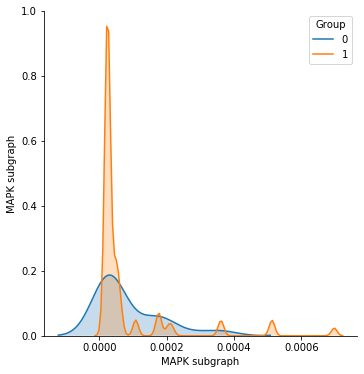

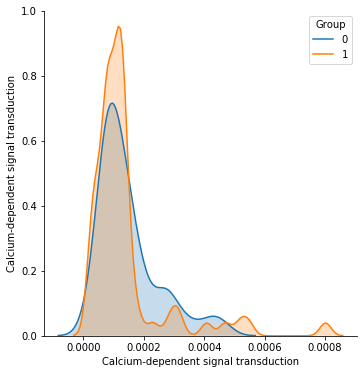

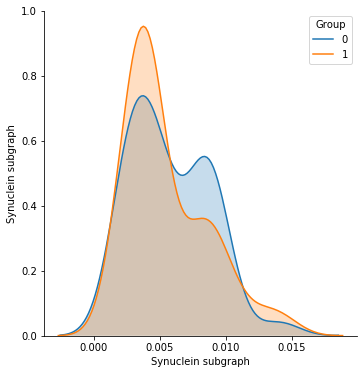

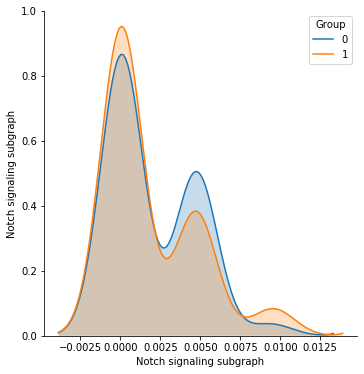

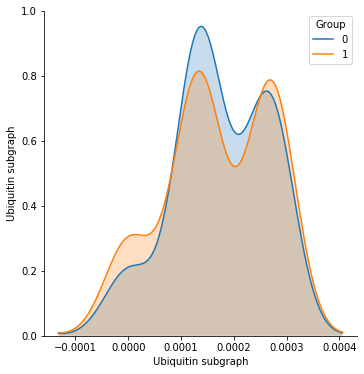

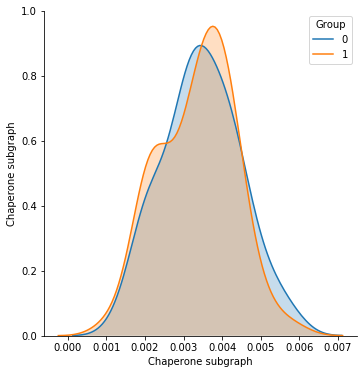

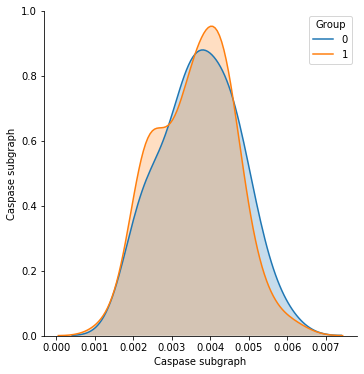

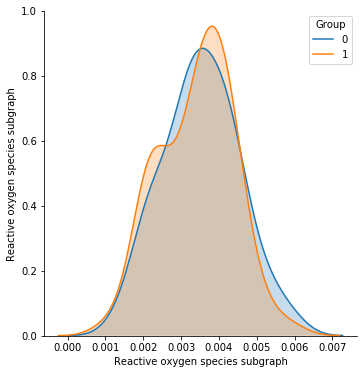

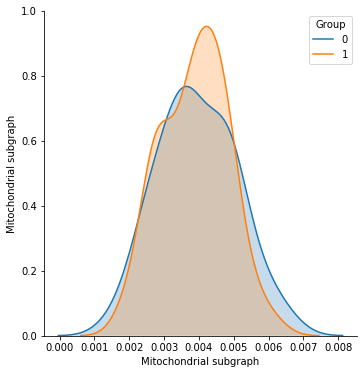

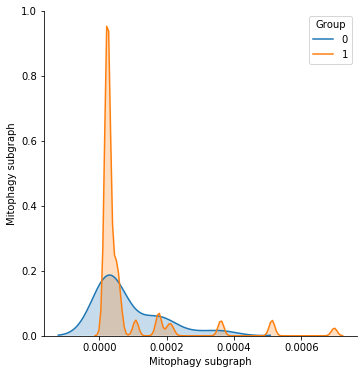

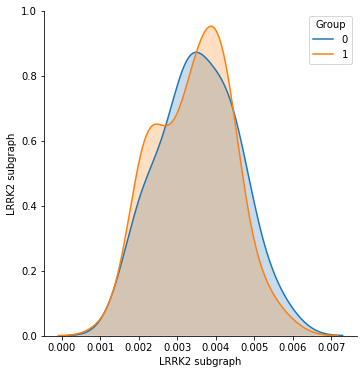

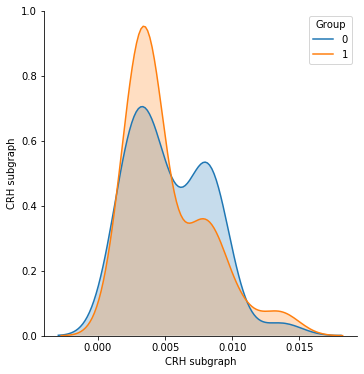

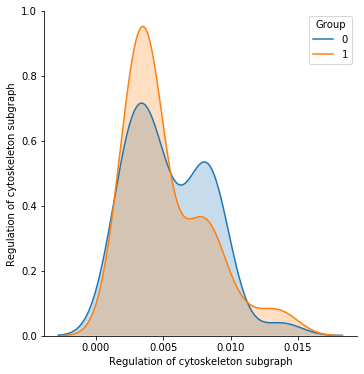

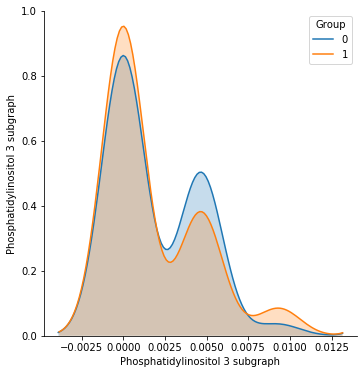

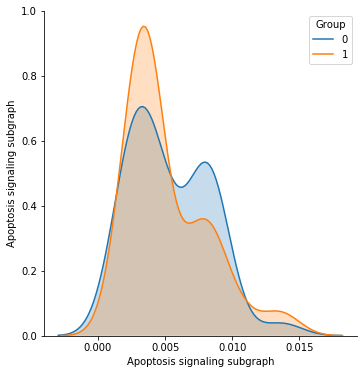

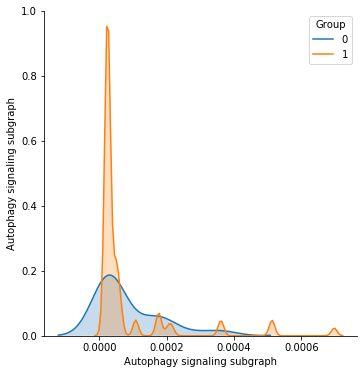

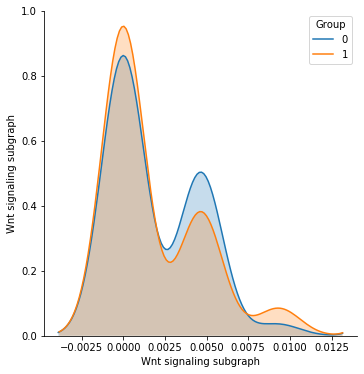

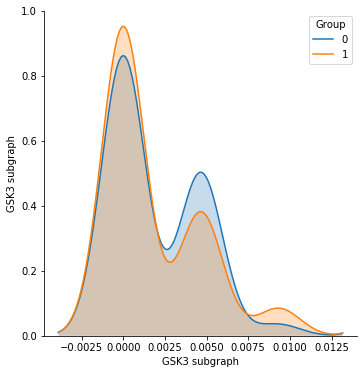

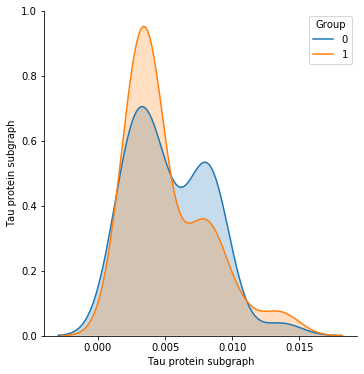

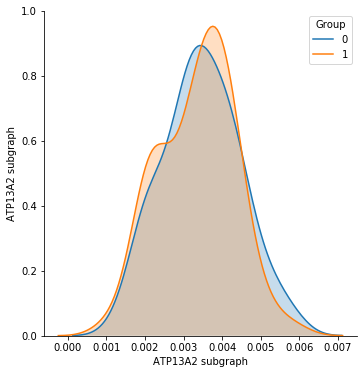

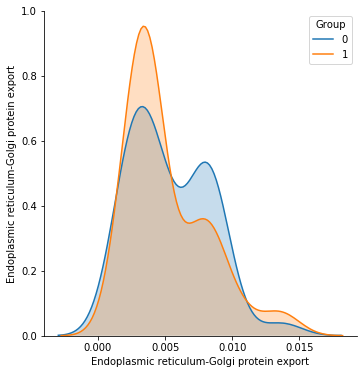

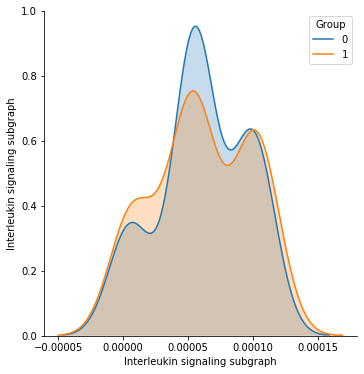

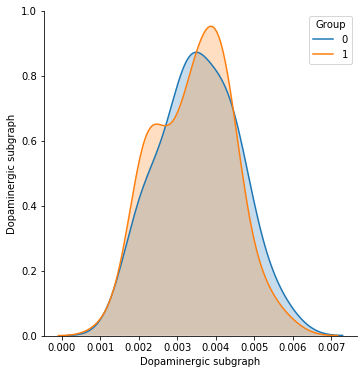

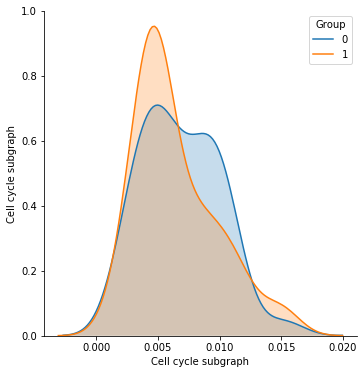

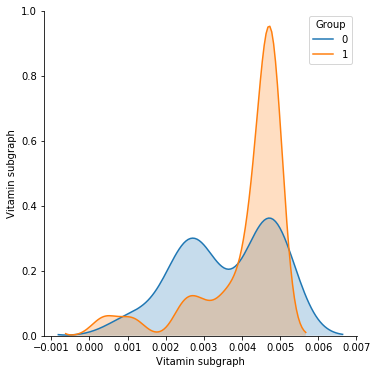

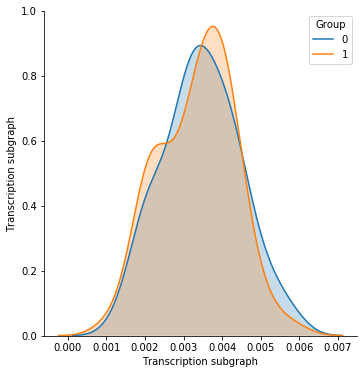

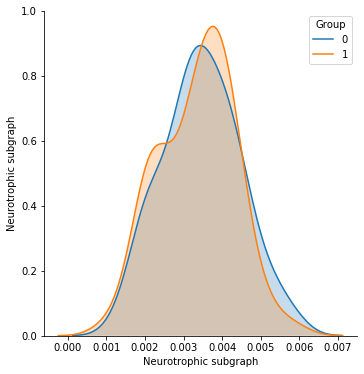

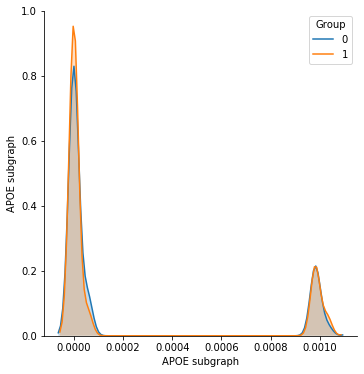

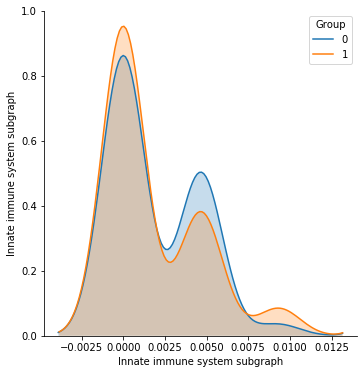

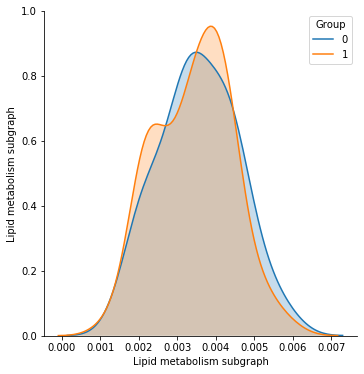

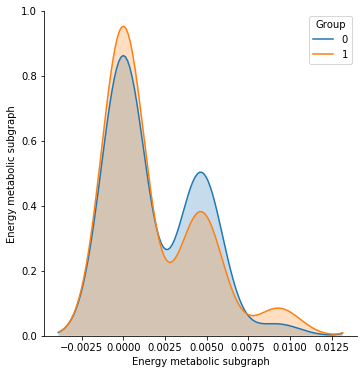

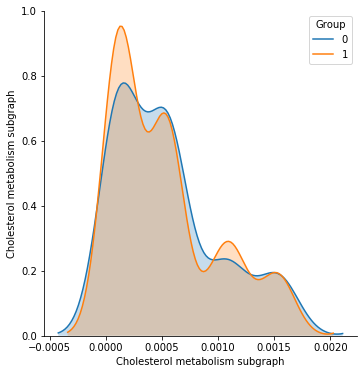

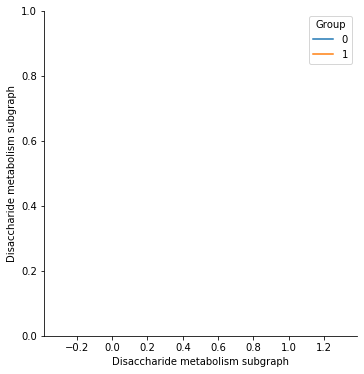

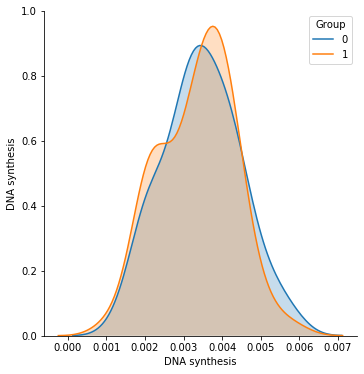

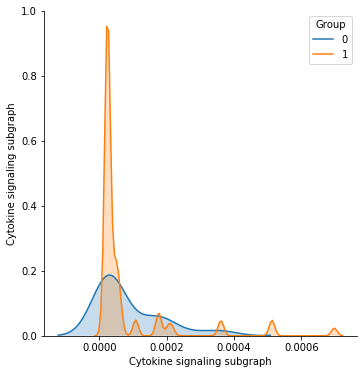

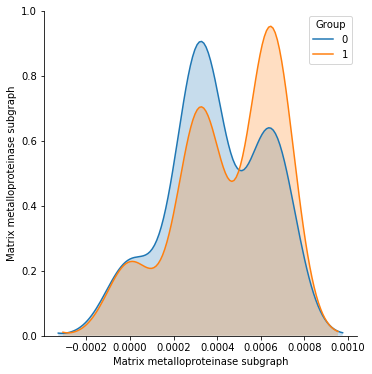

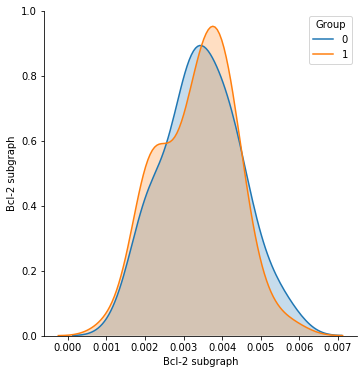

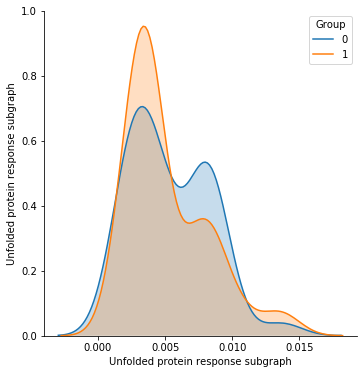

In [58]:
#plot
for col in dann_mechs_groups.columns:
    if col!="Group_IPD":
        g=sns.pairplot(dann_mechs_groups[[col,"Group_IPD"]],height=5, hue="Group_IPD")
        g._legend.remove()
        plt.legend(title='Group')

In [15]:
data_dann.to_csv("../Input_for_Models/Input_MANCOVA/chols_Mechs_dann_confs.csv",header=True,index=True)

In [8]:
############################## dann scaled ##########################
dann_mechanism_scores_scaled=pd.read_csv("../Input_for_Models/dann_mechanisms_scores_scaled_processed.csv")
dann_mechanism_scores_scaled=dann_mechanism_scores_scaled.rename(columns={"Sample":"AETID"})
dann_mechanism_scores_scaled=dann_mechanism_scores_scaled.set_index("AETID",inplace=False)
dann_mechanism_scores_scaled

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,...,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,-0.481286,-0.520376,0.938136,1.020087,1.111860,0.065285,0.112616,0.057938,-0.101104,-0.481286,...,1.048297,0.006696,1.048297,0.144222,-0.138675,0.065285,-0.481286,-0.483460,0.065285,0.976986
AET0380,-0.481286,-0.531934,-0.371179,-0.702864,-0.369448,0.971851,0.877000,0.963100,1.110019,-0.481286,...,-0.686719,0.907597,-0.686719,0.022515,-0.138675,0.971851,-0.481286,0.980734,0.971851,-0.307216
AET0027,0.805779,0.321082,-0.469557,-0.646919,1.111860,-0.495614,-0.291220,-0.553011,-0.495817,0.805779,...,-0.686719,-0.395109,-0.686719,0.022515,-0.138675,-0.495614,0.805779,-0.483460,-0.495614,-0.788537
AET0049,-0.481286,-0.249085,-0.375884,-0.702864,1.111860,0.816030,0.862441,0.843089,0.957905,-0.481286,...,-0.686719,0.752750,-0.686719,1.244569,-0.138675,0.816030,-0.481286,0.980734,0.816030,-0.358325
AET0006,0.805779,0.715997,1.439416,1.076032,-1.850757,1.744284,1.663793,1.737047,1.364675,0.805779,...,1.048297,1.830795,1.048297,0.022515,-0.138675,1.744284,0.805779,-1.947656,1.744284,1.527689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.805779,0.274955,-1.230544,-0.646919,1.111860,-1.988471,-1.782247,-2.051808,-2.279286,0.805779,...,-0.686719,-1.878639,-0.686719,-0.902515,-0.138675,-1.988471,0.805779,-1.947656,-1.988471,-1.278186
AET0071,-0.481286,-0.113801,-0.655009,-0.702864,1.111860,-0.048763,-0.001293,-0.004628,0.113683,-0.481286,...,-0.686719,-0.106640,-0.686719,-0.902515,-0.138675,-0.048763,-0.481286,0.980734,-0.048763,-0.641972
AET0138,1.138337,1.418814,-0.404500,-0.632464,1.111860,0.530349,0.773892,0.571582,0.545233,1.138337,...,-0.686719,0.664646,-0.686719,-0.902515,-0.138675,0.530349,1.138337,-0.483460,0.530349,-0.452026


In [9]:
data_dann_scaled = pd.concat([outcomes,dann_mechanism_scores_scaled,confounder], axis=1, sort=False)

In [10]:
data_dann_scaled.to_csv("../Input_for_Models/Input_MANCOVA/chols_Mechs_dann_scaled_confs.csv",header=True,index=True)

In [10]:
#with principal components
CADD13_PCs=pd.read_csv("../Input_for_Models/CADD13_mechanisms_PrincipalComponents.csv")
CADD13_PCs=CADD13_PCs.drop(["Unnamed: 0"],axis=1)
CADD13_PCs["AETID"]=samples
CADD13_PCs=CADD13_PCs.set_index("AETID",inplace=False)
CADD13_PCs.columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",]


In [11]:
CADD13_PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
AETID,,,,,,,,,,
AET0044,0.003423,-0.000226,0.000257,-0.000037,-3.125107e-05,-0.000065,0.000028,0.000042,0.000059,-0.000031
AET0380,-0.001402,0.001193,-0.000211,0.000484,1.550828e-05,-0.000096,-0.000071,-0.000040,0.000064,-0.000017
AET0027,-0.002306,-0.000119,-0.000233,0.000321,-7.302939e-07,0.000201,0.000187,0.000055,0.000029,0.000001
AET0049,-0.001481,0.001231,0.000325,-0.000095,2.568204e-04,-0.000030,0.000040,-0.000033,-0.000055,-0.000059
AET0006,0.004679,0.001498,-0.000339,0.000020,-4.413124e-05,-0.000002,-0.000113,0.000112,0.000024,0.000080
...,...,...,...,...,...,...,...,...,...,...
AET0021,-0.003705,-0.001937,0.000485,0.000107,-1.561570e-04,0.000117,-0.000020,0.000129,-0.000036,-0.000028
AET0071,-0.002375,0.000124,-0.000304,-0.000346,-1.297217e-04,-0.000006,0.000030,-0.000079,-0.000039,-0.000057
AET0138,-0.001689,0.000889,-0.000264,0.000113,-1.019014e-04,0.000141,-0.000044,0.000039,-0.000044,-0.000056


In [12]:
#merge again
#merge them 
data_pcs = pd.concat([outcomes,CADD13_PCs,confounder], axis=1, sort=False)

In [13]:
data_pcs.to_csv("../Input_for_Models/Input_MANCOVA/chols_PCs_confs.csv",header=True,index=True)

In [14]:
################################################################################################

In [15]:
#with principal components SCALED
CADD13_PCs_scaled=pd.read_csv("../Input_for_Models/CADD13_mechanisms_PrincipalComponents_scaled.csv")
CADD13_PCs_scaled=CADD13_PCs_scaled.drop(["Unnamed: 0"],axis=1)
CADD13_PCs_scaled["AETID"]=samples
CADD13_PCs_scaled=CADD13_PCs_scaled.set_index("AETID",inplace=False)
CADD13_PCs_scaled.columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",]

In [16]:
CADD13_PCs_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
AETID,,,,,,,,,,
AET0044,3.189940,1.894934,-1.723609,-0.188578,-0.832131,0.699532,-0.019742,-0.418825,-0.291180,0.400873
AET0380,0.300159,-3.460376,-0.748416,-0.148801,0.588147,-0.949976,-0.395029,0.239940,-0.443732,0.139240
AET0027,-2.646557,-0.351968,1.821846,-1.096155,-1.586295,-0.067098,-0.791966,0.883264,-0.699439,0.083304
AET0049,0.501464,-3.599681,-0.663071,2.491907,-0.717220,0.528938,-0.486433,-1.001594,-0.586683,-0.462677
AET0006,7.814074,-1.424846,1.461331,-1.180856,0.391907,-0.062001,0.385525,1.249229,2.008030,0.284551
...,...,...,...,...,...,...,...,...,...,...
AET0021,-7.149500,3.343887,1.730132,-1.834900,-2.590899,0.787313,1.015669,0.270431,-0.042873,-0.315405
AET0071,-2.379976,-1.508920,-0.583033,-0.483725,1.051040,0.363710,-1.234442,-1.148209,-0.848757,-0.198346
AET0138,-0.090879,-2.530230,2.856205,-1.157592,0.260132,1.199142,-1.119406,-0.769146,-0.206437,-0.445612


In [17]:
data_pc_scaled = pd.concat([outcomes,CADD13_PCs_scaled,confounder], axis=1, sort=False)

In [18]:
data_pc_scaled

,Campestanol µg/dl,Campesterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,PC1,PC2,PC3,PC4,PC5,...,PC7,PC8,PC9,PC10,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,41.458895,46.468789,39.662632,44.501789,42.482474,3.189940,1.894934,-1.723609,-0.188578,-0.832131,...,-0.019742,-0.418825,-0.291180,0.400873,0.062505,0.0,2.0,1,0,0
AET0380,67.878579,76.027737,64.537474,65.386895,52.602526,0.300159,-3.460376,-0.748416,-0.148801,0.588147,...,-0.395029,0.239940,-0.443732,0.139240,0.890703,1.0,1.0,0,1,0
AET0027,44.008684,46.043947,42.802895,47.678211,55.210053,-2.646557,-0.351968,1.821846,-1.096155,-1.586295,...,-0.791966,0.883264,-0.699439,0.083304,-2.185458,0.0,1.0,1,0,0
AET0049,61.334053,56.392579,59.671632,56.745526,66.070737,0.501464,-3.599681,-0.663071,2.491907,-0.717220,...,-0.486433,-1.001594,-0.586683,-0.462677,1.009017,0.0,2.0,1,0,1
AET0006,34.404368,35.503211,43.591789,41.326737,39.177263,7.814074,-1.424846,1.461331,-1.180856,0.391907,...,0.385525,1.249229,2.008030,0.284551,0.890703,1.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,31.469053,39.662632,25.072000,31.725579,35.503211,-7.149500,3.343887,1.730132,-1.834900,-2.590899,...,1.015669,0.270431,-0.042873,-0.315405,-0.292436,1.0,2.0,1,0,0
AET0071,35.148421,38.095684,30.366684,36.000789,33.430000,-2.379976,-1.508920,-0.583033,-0.483725,1.051040,...,-1.234442,-1.148209,-0.848757,-0.198346,0.417447,0.0,3.0,0,0,1
AET0138,36.000789,31.469053,43.286526,34.619421,35.148421,-0.090879,-2.530230,2.856205,-1.157592,0.260132,...,-1.119406,-0.769146,-0.206437,-0.445612,0.417447,0.0,2.0,1,0,1


In [19]:
data_pc_scaled.to_csv("../Input_for_Models/Input_MANCOVA/chols_PCs_scaled_confs.csv",header=True,index=True)

In [23]:
##################################################################################################
# Mutational load
mut_scores=pd.read_csv("../Input_for_Models/Mutational_load_scores.csv")
mut_scores=mut_scores.rename({"Unnamed: 0":"AETID"},axis=1)
mut_scores=mut_scores.set_index("AETID",inplace=False)

In [24]:
mut_scores

,Wnt signaling subgraph,Synuclein subgraph,Cell cycle subgraph,Notch signaling subgraph,Disaccharide metabolism subgraph,Energy metabolic subgraph,Innate immune system subgraph,GSK3 subgraph,APOE subgraph,Caspase subgraph,...,Neurotrophic subgraph,LRRK2 subgraph,Apoptosis signaling subgraph,Mitochondrial subgraph,Autophagy signaling subgraph,Tau protein subgraph,Phosphatidylinositol 3 subgraph,Bcl-2 subgraph,Chaperone subgraph,MAPK subgraph
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,0.991770,0.755789,0.757028,0.956349,0.0,0.991803,0.916350,0.991770,0.5,0.581281,...,0.578125,0.552764,0.810624,0.555,0.090909,0.810624,0.991770,0.578947,0.578947,0.000000
AET0380,0.008230,0.458947,0.538153,0.007937,0.0,0.012295,0.007605,0.008230,0.0,1.064039,...,1.114583,1.065327,0.494226,1.070,0.181818,0.494226,0.008230,1.115789,1.115789,0.000000
AET0027,0.008230,0.269474,0.281124,0.035714,0.0,0.012295,0.007605,0.008230,0.0,0.477833,...,0.432292,0.447236,0.193995,0.450,0.727273,0.193995,0.008230,0.431579,0.431579,0.388889
AET0049,0.008230,0.288421,0.299197,0.007937,0.0,0.012295,0.007605,0.008230,1.0,0.665025,...,0.671875,0.638191,0.297921,0.645,0.181818,0.297921,0.008230,0.668421,0.668421,0.000000
AET0006,0.991770,0.957895,0.967871,0.984127,0.0,0.991803,0.916350,0.991770,0.0,1.049261,...,1.078125,1.070352,1.032333,1.065,0.727273,1.032333,0.991770,1.084211,1.084211,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.008230,0.122105,0.154618,0.035714,0.0,0.012295,0.007605,0.008230,0.0,0.275862,...,0.223958,0.241206,0.099307,0.240,0.818182,0.099307,0.008230,0.215789,0.215789,0.388889
AET0071,0.008230,0.303158,0.273092,0.007937,0.0,0.008197,0.007605,0.008230,0.0,0.694581,...,0.703125,0.668342,0.311778,0.675,0.181818,0.311778,0.008230,0.700000,0.700000,0.000000
AET0138,0.008230,0.362105,0.383534,0.011905,0.0,0.016393,0.007605,0.008230,0.0,0.837438,...,0.848958,0.814070,0.376443,0.815,0.272727,0.376443,0.008230,0.847368,0.847368,0.055556


In [28]:
# Mutational load scaled
mut_scores_scaled=pd.read_csv("../Input_for_Models/Mutational_load_scores_scaled.csv")
mut_scores_scaled
mut_scores_scaled=mut_scores_scaled.rename({"Sample":"AETID"},axis=1)
mut_scores_scaled=mut_scores_scaled.set_index("AETID",inplace=False)

In [29]:
# cat all
data_mut = pd.concat([outcomes,mut_scores,confounder], axis=1, sort=False)
data_mut_scaled = pd.concat([outcomes,mut_scores_scaled,confounder], axis=1, sort=False)

In [30]:
data_mut_scaled

,Campestanol µg/dl,Campesterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,Wnt signaling subgraph,Synuclein subgraph,Cell cycle subgraph,Notch signaling subgraph,Disaccharide metabolism subgraph,...,Phosphatidylinositol 3 subgraph,Bcl-2 subgraph,Chaperone subgraph,MAPK subgraph,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,41.458895,46.468789,39.662632,44.501789,42.482474,1.047053,0.824903,0.815589,1.033917,-0.138675,...,1.047053,-0.335884,-0.335884,-0.491239,0.062505,0.0,2.0,1,0,0
AET0380,67.878579,76.027737,64.537474,65.386895,52.602526,-0.686789,-0.109749,0.105788,-0.697525,-0.138675,...,-0.686789,1.704326,1.704326,-0.491239,0.890703,1.0,1.0,0,1,0
AET0027,44.008684,46.043947,42.802895,47.678211,55.210053,-0.686789,-0.706336,-0.727739,-0.646813,-0.138675,...,-0.686789,-0.895941,-0.895941,1.640337,-2.185458,0.0,1.0,1,0,0
AET0049,61.334053,56.392579,59.671632,56.745526,66.070737,-0.686789,-0.646677,-0.669132,-0.697525,-0.138675,...,-0.686789,0.004151,0.004151,-0.491239,1.009017,0.0,2.0,1,0,1
AET0006,34.404368,35.503211,43.591789,41.326737,39.177263,1.047053,1.461261,1.499342,1.084629,-0.138675,...,1.047053,1.584314,1.584314,1.640337,0.890703,1.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,31.469053,39.662632,25.072000,31.725579,35.503211,-0.686789,-1.170347,-1.137991,-0.646813,-0.138675,...,-0.686789,-1.716026,-1.716026,1.640337,-0.292436,1.0,2.0,1,0,0
AET0071,35.148421,38.095684,30.366684,36.000789,33.430000,-0.686789,-0.600276,-0.753787,-0.697525,-0.138675,...,-0.686789,0.124164,0.124164,-0.491239,0.417447,0.0,3.0,0,0,1
AET0138,36.000789,31.469053,43.286526,34.619421,35.148421,-0.686789,-0.414671,-0.395631,-0.690281,-0.138675,...,-0.686789,0.684221,0.684221,-0.186728,0.417447,0.0,2.0,1,0,1


In [31]:
#write output 
data_mut.to_csv("../Input_for_Models/Input_MANCOVA/chols_mutationalscores_confs.csv",header=True,index=True)
data_mut_scaled.to_csv("../Input_for_Models/Input_MANCOVA/chols_mutationalscores_scaled_confs.csv",header=True,index=True)

In [ ]:
###########################################################################################################

In [1]:
################################### Prepare dataframes on Gene Level ######################################

In [17]:
#quickly load mutational load scores
#CADD13 mechanism features
mutaional_genelvl_scores=pd.read_csv("../Input_for_Models/Mutational_load_scores_geneslvl_neuro.csv")
mutaional_genelvl_scores=mutaional_genelvl_scores.rename(columns={"Unnamed: 0":"AETID"})
mutaional_genelvl_scores=mutaional_genelvl_scores.set_index("AETID",inplace=False)
mutaional_genelvl_scores

,SNCA,GBA,SLC41A1,MAPT,CPLX1,GDF5,LRRK2,STX1B,CASP8,APOE,CACNB2,GAK,GPNMB,TOMM40,MAP1LC3A,GPX1,CRHR1,FDFT1
AETID,,,,,,,,,,,,,,,,,,
AET0044,0.028947,0.0,1.210526,0.070841,0.0,0.5,0.000000,2.0,0.666667,0.25,0.300000,0.000000,0.962963,0.5,0.5,0.5,0.475,1.00
AET0380,0.055789,0.0,1.894737,0.000588,0.0,1.0,0.000000,0.0,0.333333,0.00,0.300000,0.000000,2.000000,1.0,1.0,0.5,0.000,1.00
AET0027,0.021579,0.0,1.894737,0.000588,1.0,0.5,0.051852,1.0,0.666667,0.00,0.033333,0.500000,0.740741,0.5,0.5,0.5,0.000,1.00
AET0049,0.033421,0.0,1.210526,0.000588,0.0,1.0,0.000000,0.0,0.666667,0.50,0.500000,0.000000,0.740741,1.0,1.0,0.5,0.000,0.25
AET0006,0.054211,0.0,1.894737,0.070841,1.0,0.5,0.051852,1.0,0.000000,0.00,0.300000,0.017241,1.000000,0.0,0.5,0.5,0.475,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.010789,0.0,0.947368,0.000588,0.0,1.0,0.051852,1.0,0.666667,0.00,0.000000,0.000000,1.000000,0.0,1.0,0.5,0.000,0.25
AET0071,0.035000,0.0,1.842105,0.000588,1.0,1.0,0.000000,1.0,0.666667,0.00,0.600000,0.017241,0.000000,1.0,1.0,0.0,0.000,0.25
AET0138,0.042368,0.0,1.842105,0.000588,0.0,1.0,0.007407,1.0,0.666667,0.00,0.566667,0.000000,1.000000,0.5,1.0,1.0,0.000,0.25


In [18]:
neurommsig_gene_set=list(mutaional_genelvl_scores.columns)# 

In [24]:
# CADD13 genepy
CADD13_gene_scores=pd.read_csv("../Input_for_Models/CADD13_genepy_normed_scores.csv")
CADD13_gene_scores=CADD13_gene_scores.rename(columns={"Sample":"AETID"})
CADD13_gene_scores=CADD13_gene_scores.set_index("AETID",inplace=False)

#Keep only neurommsig genes that are in GenePy's Genes
# we drop ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']
CADD13_gene_scores = CADD13_gene_scores[[x for x in neurommsig_gene_set if x not in ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']]]
CADD13_gene_scores

,SNCA,GBA,SLC41A1,MAPT,LRRK2,CASP8,APOE,CACNB2,GAK,GPNMB,TOMM40,FDFT1
AETID,,,,,,,,,,,,
AET0044,0.001167,0.0,0.000943,0.001463,0.000009,0.000096,0.000038,0.000019,0.000000,0.000465,0.000072,0.000165
AET0380,0.001356,0.0,0.001521,0.000000,0.000009,0.000048,0.000000,0.000019,0.000000,0.000920,0.000145,0.000165
AET0027,0.000980,0.0,0.001521,0.000000,0.000060,0.000096,0.000000,0.000002,0.000272,0.000397,0.000072,0.000165
AET0049,0.001375,0.0,0.000947,0.000000,0.000009,0.000096,0.000298,0.000032,0.000000,0.000397,0.000145,0.000040
AET0006,0.001638,0.0,0.001521,0.001463,0.000060,0.000000,0.000000,0.000019,0.000000,0.000465,0.000000,0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000494,0.0,0.000802,0.000000,0.000060,0.000096,0.000000,0.000000,0.000000,0.000465,0.000000,0.000040
AET0071,0.001080,0.0,0.001521,0.000000,0.000009,0.000096,0.000000,0.000038,0.000000,0.000000,0.000145,0.000040
AET0138,0.001262,0.0,0.001521,0.000000,0.000070,0.000096,0.000000,0.000036,0.000000,0.000465,0.000072,0.000040


In [25]:
# dann genepy
dann_gene_scores=pd.read_csv("../Input_for_Models/dann_genepy_normed_scores.csv")
dann_gene_scores=dann_gene_scores.rename(columns={"Sample":"AETID"})
dann_gene_scores=dann_gene_scores.set_index("AETID",inplace=False)

#Keep only neurommsig genes that are in GenePy's Genes
# we drop ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']
dann_gene_scores = dann_gene_scores[[x for x in neurommsig_gene_set if x not in ['CPLX1', 'CRHR1', 'STX1B', 'GDF5', 'MAP1LC3A', 'GPX1']]]
dann_gene_scores

,SNCA,GBA,SLC41A1,MAPT,LRRK2,CASP8,APOE,CACNB2,GAK,GPNMB,TOMM40,FDFT1
AETID,,,,,,,,,,,,
AET0044,0.003454,0.0,0.002959,0.004668,0.000025,0.000273,0.000056,0.000054,0.000000,0.001417,0.000323,0.000540
AET0380,0.004331,0.0,0.004765,0.000000,0.000025,0.000137,0.000000,0.000053,0.000000,0.002799,0.000647,0.000540
AET0027,0.002911,0.0,0.004765,0.000000,0.000177,0.000273,0.000000,0.000006,0.000837,0.001178,0.000323,0.000540
AET0049,0.004180,0.0,0.002969,0.000000,0.000025,0.000273,0.000982,0.000087,0.000000,0.001178,0.000647,0.000117
AET0006,0.005079,0.0,0.004765,0.004668,0.000177,0.000000,0.000000,0.000054,0.000000,0.001417,0.000000,0.000540
...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.001466,0.0,0.002525,0.000000,0.000177,0.000273,0.000000,0.000000,0.000000,0.001417,0.000000,0.000117
AET0071,0.003343,0.0,0.004765,0.000000,0.000025,0.000273,0.000000,0.000104,0.000000,0.000000,0.000647,0.000117
AET0138,0.003904,0.0,0.004765,0.000000,0.000216,0.000273,0.000000,0.000101,0.000000,0.001417,0.000323,0.000117


In [26]:
#concatenate
data_CADD13_genes = pd.concat([outcomes,CADD13_gene_scores,confounder], axis=1, sort=False)
data_dann_genes = pd.concat([outcomes,dann_gene_scores,confounder], axis=1, sort=False)
data_mut_genes= pd.concat([outcomes,mutaional_genelvl_scores,confounder], axis=1, sort=False)

In [28]:
data_CADD13_genes

,Campestanol µg/dl,Campesterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,SNCA,GBA,SLC41A1,MAPT,LRRK2,...,GAK,GPNMB,TOMM40,FDFT1,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,41.458895,46.468789,39.662632,44.501789,42.482474,0.001167,0.0,0.000943,0.001463,0.000009,...,0.000000,0.000465,0.000072,0.000165,0.062505,0.0,2.0,1,0,0
AET0380,67.878579,76.027737,64.537474,65.386895,52.602526,0.001356,0.0,0.001521,0.000000,0.000009,...,0.000000,0.000920,0.000145,0.000165,0.890703,1.0,1.0,0,1,0
AET0027,44.008684,46.043947,42.802895,47.678211,55.210053,0.000980,0.0,0.001521,0.000000,0.000060,...,0.000272,0.000397,0.000072,0.000165,-2.185458,0.0,1.0,1,0,0
AET0049,61.334053,56.392579,59.671632,56.745526,66.070737,0.001375,0.0,0.000947,0.000000,0.000009,...,0.000000,0.000397,0.000145,0.000040,1.009017,0.0,2.0,1,0,1
AET0006,34.404368,35.503211,43.591789,41.326737,39.177263,0.001638,0.0,0.001521,0.001463,0.000060,...,0.000000,0.000465,0.000000,0.000165,0.890703,1.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,31.469053,39.662632,25.072000,31.725579,35.503211,0.000494,0.0,0.000802,0.000000,0.000060,...,0.000000,0.000465,0.000000,0.000040,-0.292436,1.0,2.0,1,0,0
AET0071,35.148421,38.095684,30.366684,36.000789,33.430000,0.001080,0.0,0.001521,0.000000,0.000009,...,0.000000,0.000000,0.000145,0.000040,0.417447,0.0,3.0,0,0,1
AET0138,36.000789,31.469053,43.286526,34.619421,35.148421,0.001262,0.0,0.001521,0.000000,0.000070,...,0.000000,0.000465,0.000072,0.000040,0.417447,0.0,2.0,1,0,1


In [29]:
####### write output 
data_CADD13_genes.to_csv("../Input_for_Models/Input_MANCOVA/chols_CADD13_genelvl_confs.csv",header=True,index=True)
#
data_dann_genes.to_csv("../Input_for_Models/Input_MANCOVA/chols_dann_genelvl_confs.csv",header=True,index=True)
#
data_mut_genes.to_csv("../Input_for_Models/Input_MANCOVA/chols_mutationalscores_genelvl_confs.csv",header=True,index=True)


In [ ]:
###################################################################################################################